In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
from flipper.run.run import BinomRun
from flipper.utils import logit

In [16]:
np.random.seed(0)
n = 1000
x = np.random.uniform(low=0, high=np.pi, size=n)
p = np.exp(np.sin(x)) / (1 + np.exp(np.sin(x)))
df = pd.DataFrame({
    'success': np.random.binomial(n=100, size=len(p), p=p),
    'total': np.repeat(100, repeats=len(p)),
    'p': p,
    'x1': x
})

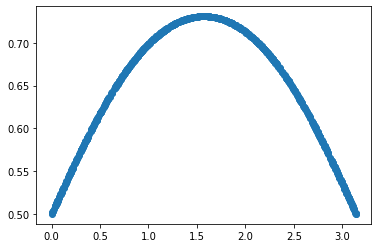

In [17]:
plt.scatter(df.x1, df.p)

In [25]:
splines = {
    'x1': {
        'degree': 3,
        'knots_num': 4,
        'knots_type': 'frequency',
        'decreasing': True
    }
}
b_run = BinomRun(
    col_success='success',
    col_total='total',
    df=df,
    splines=splines,
    solver_method='ipopt'
)
b_run.fit(x_init=[0.0] * 6)
predictions = b_run.predict()

### Graph for p

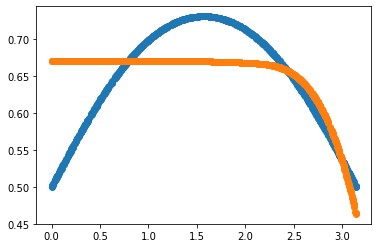

In [26]:
plt.scatter(df.x1, df.p)
plt.scatter(df.x1, predictions)

### Graph for Logit(p)

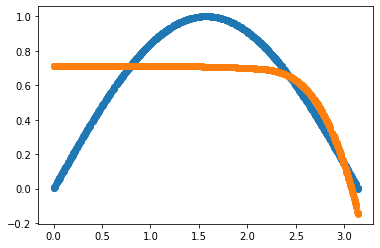

In [27]:
plt.scatter(df.x1, logit(df.p))
plt.scatter(df.x1, logit(predictions))